In [1]:
import sys
sys.path.append("..")

In [2]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4


/Users/princetonpoh/Github/yolo-v4-tf.keras/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
 # defining pathes and callbacks

from config import yolo_config
import os
from tensorflow import keras

dir4saving = 'path2checkpoint/checkpoints'
os.makedirs(dir4saving, exist_ok = True)

logdir = 'path4logdir/logs'
os.makedirs(logdir, exist_ok = True)

name4saving = 'epoch_{epoch:02d}-val_loss-{val_loss:.4f}.hdf5'

filepath = os.path.join(dir4saving, name4saving)

rLrCallBack = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                             factor = 0.1,
                                             patience = 5,
                                             verbose = 1)

tbCallBack = keras.callbacks.TensorBoard(log_dir = logdir,
                                         histogram_freq = 0,
                                         write_graph = False,
                                         write_images = False)

mcCallBack_loss = keras.callbacks.ModelCheckpoint(filepath,
                                            monitor = 'val_loss',
                                            verbose = 1,
                                            save_best_only = True,
                                            save_weights_only = False,
                                            mode = 'auto',
                                            # save_freq = 1)
                                            period = 1)

esCallBack = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                          mode = 'min',
                                          verbose = 1,
                                          patience = 10)

In [4]:
# train_lines, val_lines = read_annotation_lines('../dataset/txt/anno-test.txt', test_size=0.1)
train_lines, val_lines = read_annotation_lines('../dataset/txt/anno.txt', test_size=0.1)
FOLDER_PATH = '../dataset/annotated-images'
class_name_path = '../class_names/pothole_class.txt'
data_gen_train = DataGenerator(train_lines, class_name_path, FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, FOLDER_PATH)

model = Yolov4(weight_path=None, 
               class_name_path=class_name_path)

model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=10000, 
          # epochs=1, 
          val_data_gen=data_gen_val,
          callbacks=[rLrCallBack,
                     tbCallBack,
                     mcCallBack_loss,
                     esCallBack,])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-11-04 00:15:51.455134: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-04 00:15:51.455265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


nms iou: 0.413 score: 0.275
Epoch 1/10000


2023-11-04 00:15:53.999707: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-11-04 00:16:02.267631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 51082.5117

2023-11-04 00:20:05.505704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 94062.80469, saving model to path2checkpoint/checkpoints/epoch_01-val_loss-94062.8047.hdf5
75/75 [==============================] - 268s 3s/step - loss: 51082.5117 - val_loss: 94062.8047 - lr: 1.0000e-04
Epoch 2/10000
75/75 [==============================] - ETA: 0s - loss: 17204.3770
Epoch 2: val_loss improved from 94062.80469 to 57477.09375, saving model to path2checkpoint/checkpoints/epoch_02-val_loss-57477.0938.hdf5
75/75 [==============================] - 252s 3s/step - loss: 17204.3770 - val_loss: 57477.0938 - lr: 1.0000e-04
Epoch 3/10000
75/75 [==============================] - ETA: 0s - loss: 8033.8818
Epoch 3: val_loss improved from 57477.09375 to 29202.98047, saving model to path2checkpoint/checkpoints/epoch_03-val_loss-29202.9805.hdf5
75/75 [==============================] - 226s 3s/step - loss: 8033.8818 - val_loss: 29202.9805 - lr: 1.0000e-04
Epoch 4/10000
75/75 [==============================] - ETA: 0s - loss: 4487.2686
Epoch 4: va

img shape:  (300, 452, 3)


2023-11-04 03:22:14.209189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
# of bboxes: 1


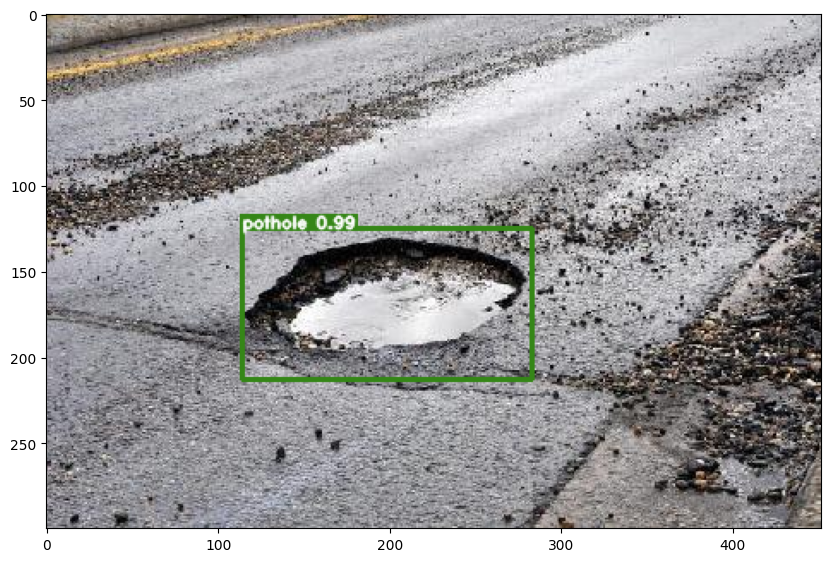

In [5]:
# model = Yolov4(weight_path='path2checkpoint/checkpoints/epoch_40-val_loss-371.8328.hdf5',
#                class_name_path='../class_names/pothole_class.txt')
pred = model.predict('../random_testing/potpot3.jpg')


img shape:  (300, 400, 3)
1/1 [==============================] - 0s 366ms/step
# of bboxes: 2


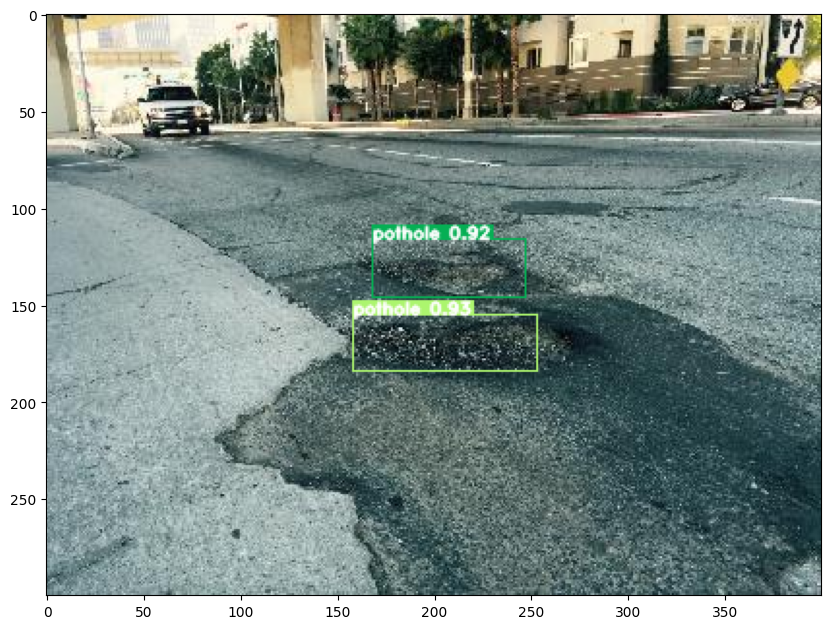

img shape:  (300, 450, 3)
1/1 [==============================] - 0s 453ms/step
# of bboxes: 2


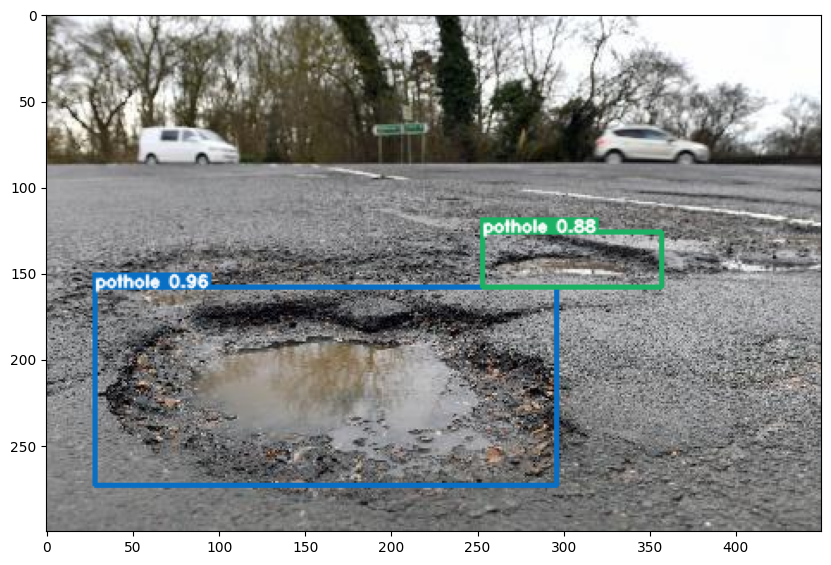

img shape:  (300, 452, 3)
1/1 [==============================] - 0s 309ms/step
# of bboxes: 1


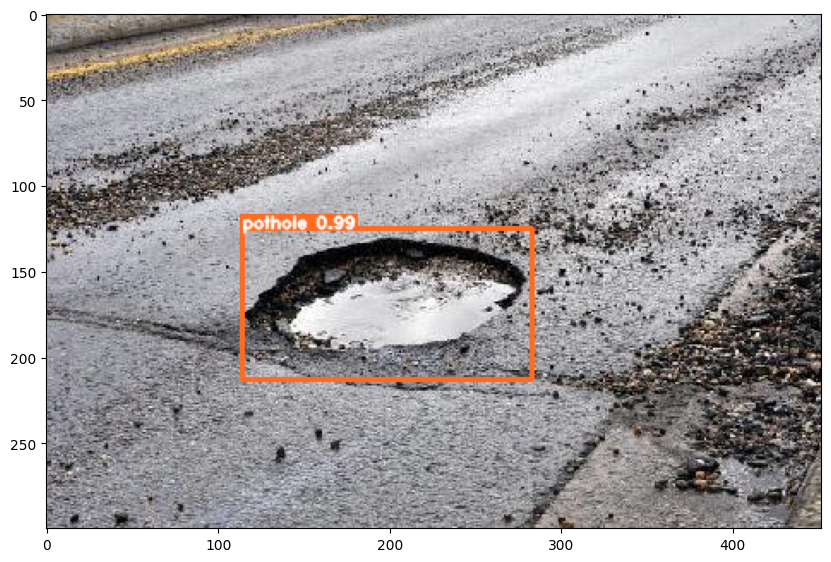

img shape:  (1564, 1704, 3)
1/1 [==============================] - 0s 394ms/step
# of bboxes: 1


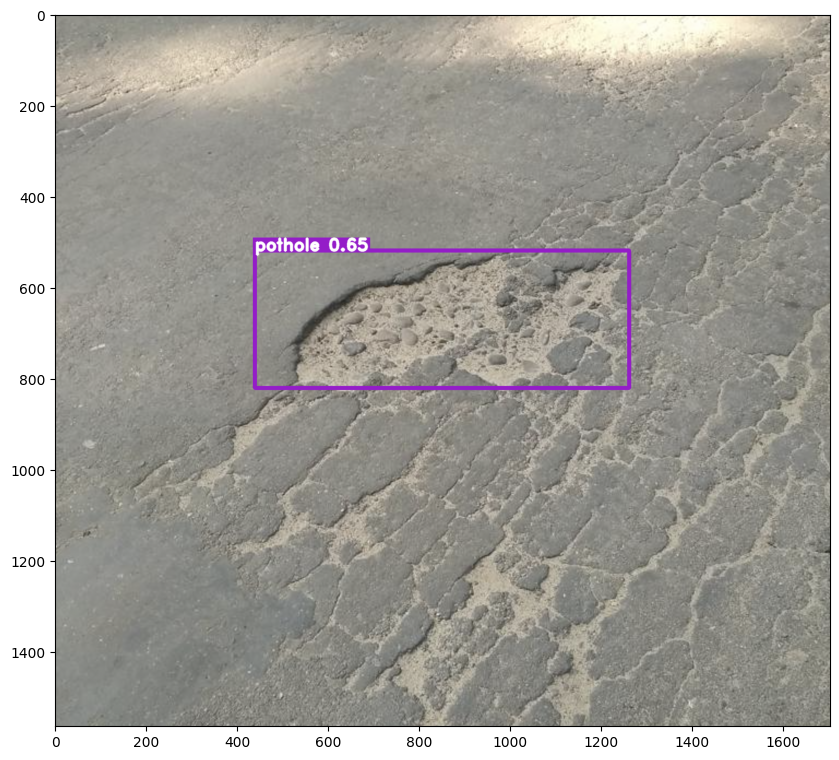

img shape:  (636, 1280, 3)
1/1 [==============================] - 0s 319ms/step
# of bboxes: 1


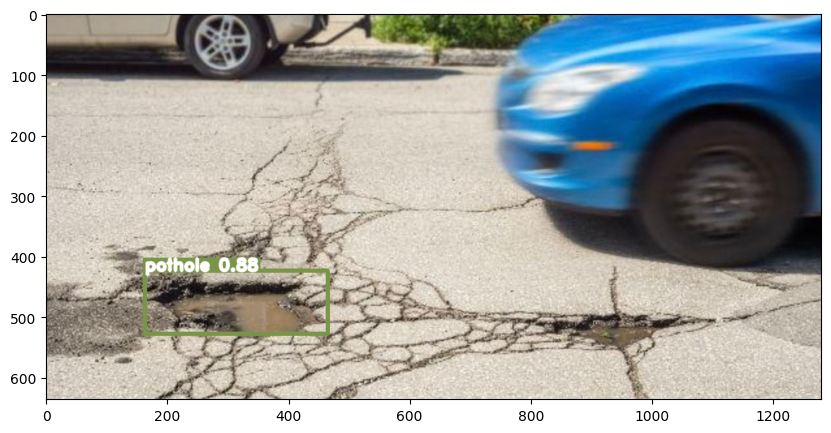

x1   y1   x2   y2 class_name     score    w    h
0  163  424  465  528    pothole  0.883024  302  104

In [7]:
model.predict('../random_testing/potpot1.jpg')
model.predict('../random_testing/potpot2.jpg')
model.predict('../random_testing/potpot3.jpg')
model.predict('../random_testing/potpot.png')
model.predict('../random_testing/potpot.jpeg')